Dataset Details - https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Basic Statistics

In [3]:
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of rows:  50000
Number of columns:  2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
data.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

from the above, we can confirm that the data is equally partioned.

### Data Cleaning and preprocessing

In [6]:
data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In the above data we can see \<br>\ break tags. We need to remove them before using this data.  

In [9]:
from bs4 import BeautifulSoup
cleantext = BeautifulSoup(data["review"][1], 'lxml').text
cleantext

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

We need to remove the slash 

In [10]:
import re
cleantext = re.sub(r'[^\w\s]', '', cleantext)
cleantext

'A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great masters of comedy and his life The realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwells murals decorating every surface are terribly well done'

In [12]:
import nltk
from nltk.corpus import stopwords


In [14]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/syedjafer/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
token = cleantext.lower().split()
stopword = set(stopwords.words('english'))
token_list = [ word for word in token if word.lower() not in stopword ]

In [22]:
" ".join(token_list)

'wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done'

In [24]:
from nltk.stem import WordNetLemmatizer

In [25]:
lemmatizer = WordNetLemmatizer()

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/syedjafer/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [29]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/syedjafer/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [30]:
lemmatizer.lemmatize(" ".join(token_list))

'wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done'

In [31]:
data.keys()

Index(['review', 'sentiment'], dtype='object')

In [37]:
from tqdm import tqdm
def data_cleaner(data):
    clean_data = []
    for review in tqdm(data):
        cleantext = BeautifulSoup(review, "lxml").text
        cleantext = re.sub(r'[^\w\s]', '', cleantext)
        cleantext = [ token for token in cleantext.lower().split() if token not in stopword ]
        cleantext = lemmatizer.lemmatize(" ".join(cleantext))
        clean_data.append(cleantext.strip())
    return clean_data

In [38]:
clean_data = data_cleaner(data.review.values)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:18<00:00, 2742.07it/s]


In [39]:
clean_data[0]

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

### Train test split

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data.sentiment, test_size=0.2, random_state=42, stratify=data.sentiment)

In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
le_test = LabelEncoder()
y_test = le_test.fit_transform(y_test)

In [67]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 2) (40000,)
(10000, 2) (10000,)


In [68]:
clean_data_train_data = data_cleaner(X_train.review.values)

  2%|██                                                                                                                            | 666/40000 [00:00<00:17, 2288.04it/s]/home/syedjafer/Documents/MachineLearning/mlenv/lib/python3.8/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40000/40000 [00:15<00:00, 2614.73it/s]


In [69]:
X_train['cleaned_text'] = clean_data_train_data
X_train.head()

,review,sentiment,cleaned_text
47808,I caught this little gem totally by accident b...,positive,caught little gem totally accident back 1980 8...
20154,I can't believe that I let myself into this mo...,negative,cant believe let movie accomplish favor friend...
43069,*spoiler alert!* it just gets to me the nerve ...,negative,spoiler alert gets nerve people remake use ter...
19413,If there's one thing I've learnt from watching...,negative,theres one thing ive learnt watching george ro...
13673,"I remember when this was in theaters, reviews ...",negative,remember theaters reviews said horrible well d...


In [70]:
clean_data_test_data = data_cleaner(X_test.review.values)
X_test['cleaned_text'] = clean_data_test_data
X_test.head()

  2%|██▏                                                                                                                           | 175/10000 [00:00<00:05, 1740.68it/s]/home/syedjafer/Documents/MachineLearning/mlenv/lib/python3.8/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2676.03it/s]


,review,sentiment,cleaned_text
18870,"Yes, MTV there really is a way to market Daria...",negative,yes mtv really way market daria started clever...
39791,The story of the bride fair is an amusing and ...,negative,story bride fair amusing engaging one filmmake...
30381,"A team varied between Scully and Mulder, two o...",positive,team varied scully mulder two scientists pilot...
42294,This was a popular movie probably because of t...,negative,popular movie probably humor fastmoving story ...
33480,This movie made me so angry!! Here I am thinki...,negative,movie made angry thinking heres new horror mov...


### Vectorizer

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
vec = CountVectorizer()
vec = vec.fit(X_train.cleaned_text)
train_x_bow = vec.transform(X_train.cleaned_text)
test_x_bow = vec.transform(X_test.cleaned_text)

In [73]:
print(train_x_bow.shape)
print(test_x_bow.shape)

(40000, 192139)
(10000, 192139)


### Naive Bayes with Hyperparameter Tuning

In [74]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [75]:
classifier = MultinomialNB()

In [76]:
alpha_ranges = {
    "alpha": [0.001, 0.01, 0.1, 1, 10.0, 100]
}

In [77]:
grid_search = GridSearchCV(classifier, param_grid=alpha_ranges, scoring='accuracy', cv=3, return_train_score=True)
grid_search.fit(train_x_bow, y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10.0, 100]},
             return_train_score=True, scoring='accuracy')

In [78]:
alpha = [0.001, 0.01, 0.1, 1, 10.0, 100]
train_acc = grid_search.cv_results_['mean_train_score']
train_std = grid_search.cv_results_['std_train_score']

test_acc = grid_search.cv_results_['mean_test_score']
test_std = grid_search.cv_results_['std_test_score']


In [79]:
import matplotlib.pyplot as plt

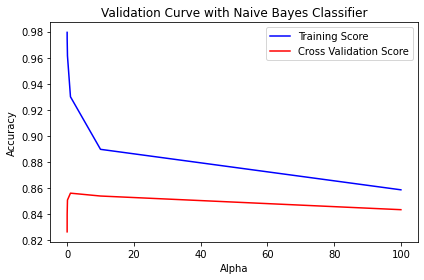

In [80]:
plt.plot(alpha, train_acc, label="Training Score", color='b')
plt.plot(alpha, test_acc, label="Cross Validation Score", color='r')

plt.title("Validation Curve with Naive Bayes Classifier")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [81]:
grid_search.best_estimator_

MultinomialNB(alpha=1)

In [82]:
classifier = MultinomialNB(alpha=1)
classifier.fit(train_x_bow, y_train)


MultinomialNB(alpha=1)

In [84]:
predict = classifier.predict(test_x_bow)

In [85]:
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_test, predict))

Accuracy is  0.8599


In [86]:
from sklearn.metrics import classification_report
print("Accuracy is ", classification_report(y_test, predict))

Accuracy is                precision    recall  f1-score   support

           0       0.85      0.88      0.86      5000
           1       0.87      0.84      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### Some Testing

In [87]:
text = ["I liked the movie. It was great"]
text_vec = vec.transform(text)
classifier.predict(text_vec)

array([1])

In [88]:
le.inverse_transform([1])

array(['positive'], dtype=object)

In [89]:
text = ["Movie was worse"]
text_vec = vec.transform(text)
classifier.predict(text_vec)

array([0])

In [90]:
le.inverse_transform([0])

array(['negative'], dtype=object)

### Save Model and Vector

In [91]:
from joblib import dump
dump(vec, 'vectors.joblib')
dump(classifier, 'classifier.joblib')


['classifier.joblib']